## Pré-processamento

In [141]:
#importando bibliotecas
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

import numpy as np
import seaborn as sns

In [229]:
#lendo conjunto de dados
dados = pd.read_csv("biodiversity-br.csv")

dados

,alt,temp2m,temp2mrange,humidity,precip,atm,wind,m.fapar,classe
0,0.361674,0.719384,0.719384,0.614403,0.594679,0.979630,0.192118,0.665940,0
1,0.067043,0.916464,0.916464,0.579856,0.516432,0.994444,0.170624,0.365190,0
2,0.039864,0.856448,0.856448,0.818496,0.624413,1.000000,0.123337,0.798657,0
3,0.064889,0.821573,0.821573,0.872974,0.632238,1.000000,0.173509,0.999390,0
4,0.025681,0.788321,0.788321,1.000000,0.871674,1.000000,0.283287,0.896407,0
...,...,...,...,...,...,...,...,...,...
860,0.118726,0.142741,0.142741,0.707414,0.397496,0.112963,0.250426,0.623997,0
861,0.014968,0.197891,0.197891,0.718044,0.369327,0.112963,0.252041,0.455267,1
862,0.129396,0.142741,0.142741,0.680308,0.367762,0.061111,0.242492,0.627834,0
863,0.000000,0.213301,0.213301,0.712463,0.350548,0.061111,0.240703,0.397279,0


In [230]:
dados.shape

(865, 9)

In [231]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   alt          865 non-null    float64
 1   temp2m       865 non-null    float64
 2   temp2mrange  865 non-null    float64
 3   humidity     865 non-null    float64
 4   precip       865 non-null    float64
 5   atm          865 non-null    float64
 6   wind         865 non-null    float64
 7   m.fapar      865 non-null    float64
 8   classe       865 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 60.9 KB


In [232]:
dados.describe()

,alt,temp2m,temp2mrange,humidity,precip,atm,wind,m.fapar,classe
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000
mean,0.380137,0.590931,0.590931,0.504792,0.377070,0.692490,0.203849,0.509579,0.485549
std,0.238339,0.229654,0.229654,0.200538,0.170868,0.222542,0.077483,0.184468,0.500080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180918,0.421736,0.421736,0.381079,0.286385,0.540741,0.154468,0.377747,0.000000
50%,0.370410,0.622060,0.622060,0.516609,0.381847,0.720370,0.209140,0.489710,0.000000
75%,0.555053,0.777778,0.777778,0.668084,0.471049,0.879630,0.250426,0.616062,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [233]:
dados["classe"].unique()

array([0, 1], dtype=int64)

In [234]:
dados["classe"].value_counts()

0    445
1    420
Name: classe, dtype: int64

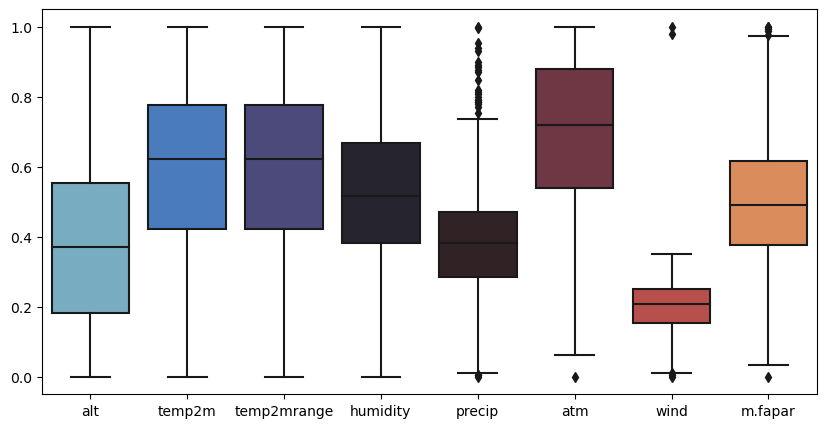

In [235]:
plt.rcParams["figure.figsize"] = (10, 5)
ax = sns.boxplot(data=dados.loc[:, dados.columns != "classe"], palette="icefire")

In [236]:
boxplot_stats(dados)

[{'mean': 0.3801372230341953,
  'iqr': 0.374134170360997,
  'cilo': 0.350437756921319,
  'cihi': 0.390381519279905,
  'whishi': 1.0,
  'whislo': 0.0,
  'fliers': array([], dtype=float64),
  'q1': 0.180918483184264,
  'med': 0.370409638100612,
  'q3': 0.555052653545261},
 {'mean': 0.5909305280133514,
  'iqr': 0.356042173560422,
  'cilo': 0.6030539148043492,
  'cihi': 0.6410661176368508,
  'whishi': 1.0,
  'whislo': 0.0,
  'fliers': array([], dtype=float64),
  'q1': 0.421735604217356,
  'med': 0.6220600162206,
  'q3': 0.777777777777778},
 {'mean': 0.5909305280133514,
  'iqr': 0.356042173560422,
  'cilo': 0.6030539148043492,
  'cihi': 0.6410661176368508,
  'whishi': 1.0,
  'whislo': 0.0,
  'fliers': array([], dtype=float64),
  'q1': 0.421735604217356,
  'med': 0.6220600162206,
  'q3': 0.777777777777778},
 {'mean': 0.5047918660397327,
  'iqr': 0.287005049162902,
  'cilo': 0.5012882993383391,
  'cihi': 0.5319298776481088,
  'whishi': 1.0,
  'whislo': 0.0,
  'fliers': array([], dtype=float64

In [237]:
#selecionando outliers acima de 0,8
outliers = boxplot_stats(dados["precip"]).pop(0)["fliers"]

outliers = np.delete(outliers, np.where(outliers < 0.8))

outliers

array([0.87167449, 0.81846635, 1.        , 0.95305164, 0.89827856,
       0.93114241, 0.89201878, 0.87793427, 0.88419405, 0.84663537,
       0.81377152, 0.99687011, 0.80751174, 0.94053208])

In [238]:
#dropando outliers
dados.drop(np.where(dados["precip"].isin(outliers))[0], inplace=True)

dados

,alt,temp2m,temp2mrange,humidity,precip,atm,wind,m.fapar,classe
0,0.361674,0.719384,0.719384,0.614403,0.594679,0.979630,0.192118,0.665940,0
1,0.067043,0.916464,0.916464,0.579856,0.516432,0.994444,0.170624,0.365190,0
2,0.039864,0.856448,0.856448,0.818496,0.624413,1.000000,0.123337,0.798657,0
3,0.064889,0.821573,0.821573,0.872974,0.632238,1.000000,0.173509,0.999390,0
6,0.026737,0.845093,0.845093,0.893170,0.784038,1.000000,0.265399,0.724538,1
...,...,...,...,...,...,...,...,...,...
860,0.118726,0.142741,0.142741,0.707414,0.397496,0.112963,0.250426,0.623997,0
861,0.014968,0.197891,0.197891,0.718044,0.369327,0.112963,0.252041,0.455267,1
862,0.129396,0.142741,0.142741,0.680308,0.367762,0.061111,0.242492,0.627834,0
863,0.000000,0.213301,0.213301,0.712463,0.350548,0.061111,0.240703,0.397279,0


In [239]:
dados.shape

(851, 9)

In [240]:
dados.describe()

,alt,temp2m,temp2mrange,humidity,precip,atm,wind,m.fapar,classe
count,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000
mean,0.386046,0.586568,0.586568,0.499357,0.368547,0.687457,0.204346,0.504397,0.484136
std,0.235750,0.228936,0.228936,0.197374,0.158501,0.220848,0.077650,0.180897,0.500042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185954,0.418086,0.418086,0.379617,0.284820,0.540741,0.155925,0.377006,0.000000
50%,0.378217,0.619627,0.619627,0.512889,0.380282,0.720370,0.209602,0.485438,0.000000
75%,0.557584,0.770073,0.770073,0.658384,0.461659,0.879630,0.250483,0.611659,1.000000
max,1.000000,1.000000,1.000000,0.899282,0.798122,1.000000,1.000000,1.000000,1.000000


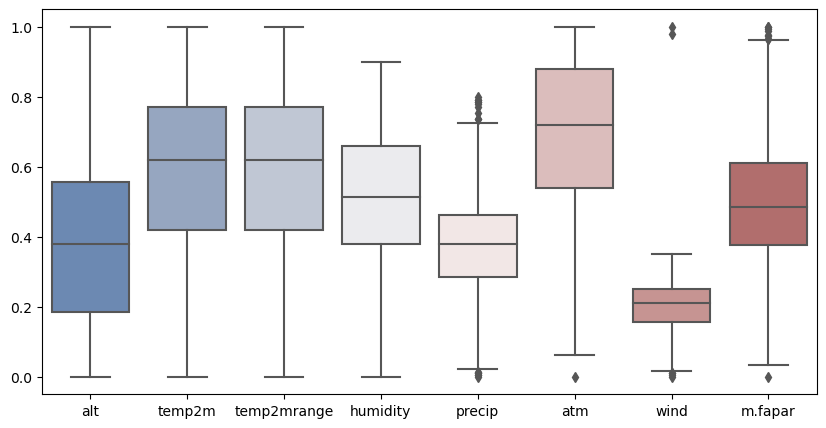

In [241]:
plt.rcParams["figure.figsize"] = (10, 5)
ax = sns.boxplot(data=dados.loc[:, dados.columns != "classe"], palette="vlag")

In [242]:
corr = dados.corr()

corr

,alt,temp2m,temp2mrange,humidity,precip,atm,wind,m.fapar,classe
alt,1.000000,-0.482815,-0.482815,-0.140113,-0.071435,-0.189713,-0.156504,-0.338721,0.052244
temp2m,-0.482815,1.000000,1.000000,-0.553105,-0.303040,0.883352,0.191406,-0.176105,0.035204
temp2mrange,-0.482815,1.000000,1.000000,-0.553105,-0.303040,0.883352,0.191406,-0.176105,0.035204
humidity,-0.140113,-0.553105,-0.553105,1.000000,0.756758,-0.488633,-0.211998,0.710844,0.045058
precip,-0.071435,-0.303040,-0.303040,0.756758,1.000000,-0.320913,-0.365495,0.628445,0.066954
atm,-0.189713,0.883352,0.883352,-0.488633,-0.320913,1.000000,0.205739,-0.176514,0.073952
wind,-0.156504,0.191406,0.191406,-0.211998,-0.365495,0.205739,1.000000,-0.199224,0.006998
m.fapar,-0.338721,-0.176105,-0.176105,0.710844,0.628445,-0.176514,-0.199224,1.000000,0.058583
classe,0.052244,0.035204,0.035204,0.045058,0.066954,0.073952,0.006998,0.058583,1.000000


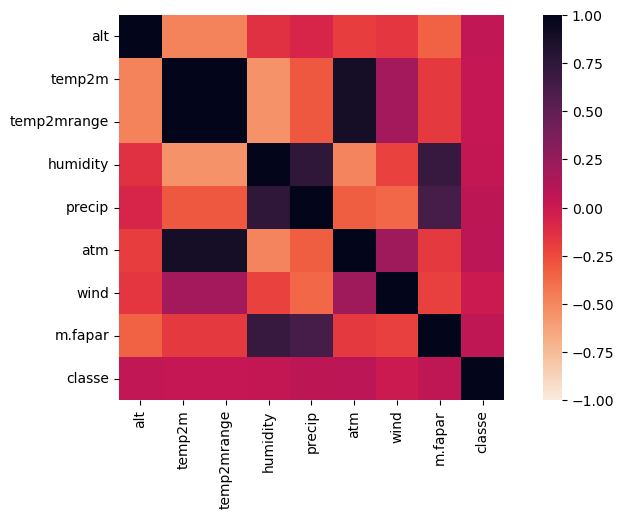

In [243]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="rocket_r",
    square=True
)

In [244]:
#removendo atributos duplicados
dados = dados.drop("temp2mrange", axis=1)

dados

,alt,temp2m,humidity,precip,atm,wind,m.fapar,classe
0,0.361674,0.719384,0.614403,0.594679,0.979630,0.192118,0.665940,0
1,0.067043,0.916464,0.579856,0.516432,0.994444,0.170624,0.365190,0
2,0.039864,0.856448,0.818496,0.624413,1.000000,0.123337,0.798657,0
3,0.064889,0.821573,0.872974,0.632238,1.000000,0.173509,0.999390,0
6,0.026737,0.845093,0.893170,0.784038,1.000000,0.265399,0.724538,1
...,...,...,...,...,...,...,...,...
860,0.118726,0.142741,0.707414,0.397496,0.112963,0.250426,0.623997,0
861,0.014968,0.197891,0.718044,0.369327,0.112963,0.252041,0.455267,1
862,0.129396,0.142741,0.680308,0.367762,0.061111,0.242492,0.627834,0
863,0.000000,0.213301,0.712463,0.350548,0.061111,0.240703,0.397279,0


## Usando KNN

In [216]:
#importando bibliotecas
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier

In [254]:
x = dados.drop("classe", axis=1)
y = dados["classe"]

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.1)

In [255]:
# usando o KNN (4NN)
clf = KNeighborsClassifier(n_neighbors = 4)

In [256]:
# fazendo 10-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=10)
# verificando o resultado da acuracia
np.mean(scores)

D:\Users\yello\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Users\yello\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.5803315105946686

In [257]:
# ajustando o modelo com o conjunto de treinamento
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [258]:
y_pred = clf.predict(X_test)

D:\Users\yello\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [259]:
# gerando matriz de confusão
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,34,13,47
1,18,21,39
All,52,34,86


In [260]:
# verificando o resultado com a métrica recall
recall_score(y_test, y_pred, average='macro')

0.6309328968903437

In [261]:
# verificando o resultado com a métrica precisão
precision_score(y_test, y_pred, average='macro')

0.6357466063348416

In [262]:
# verificando o resultado com a métrica F1
f1_score(y_test, y_pred, average='macro')

0.6311055763110558